# Importing liberaries

In [1]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow import set_random_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras.models import load_model

# Data Pre-Processing

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


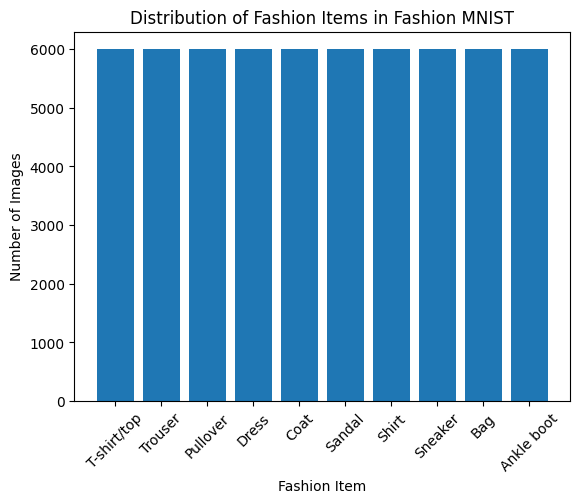

In [3]:
classes = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

# Count the occurrences of each class label in the training data
class_counts = {}
for label in y_train:
  if label in class_counts:
    class_counts[label] += 1
  else:
    class_counts[label] = 1

# Create a bar chart to visualize the distribution
bars = plt.bar(classes, class_counts.values())

plt.xlabel("Fashion Item")
plt.ylabel("Number of Images")
plt.title("Distribution of Fashion Items in Fashion MNIST")
plt.xticks(rotation=45)
plt.show()

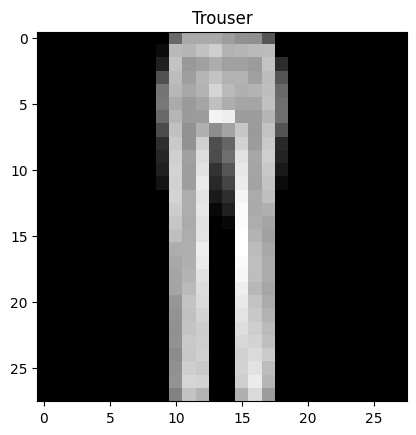

In [4]:
n=69
plt.imshow(x_train[n], cmap="gray")
plt.title(classes[y_train[n]])
plt.show()

In [5]:
# Reshape
x_train1 = x_train.reshape(60000, 784).astype("float32")
x_test1 = x_test.reshape(10000, 784).astype("float32")

# Normalize to range [0, 1]
x_train2 = x_train1/255.0
x_test2 = x_test1/255.0

# One-hot encode labels
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

# Model Building

Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7034 - loss: 0.8726 - val_accuracy: 0.7911 - val_loss: 0.7184 - learning_rate: 0.2000
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8290 - loss: 0.4783 - val_accuracy: 0.8322 - val_loss: 0.4944 - learning_rate: 0.2000
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.4356 - val_accuracy: 0.8527 - val_loss: 0.4090 - learning_rate: 0.2000
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.4057 - val_accuracy: 0.8584 - val_loss: 0.3850 - learning_rate: 0.2000
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8608 - loss: 0.3823 - val_accuracy: 0.8582 - val_loss: 0.3826 - learning_rate: 0.2000
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.3680 - val_accuracy: 0.8636 - val_loss: 0.3714 - learning_rate: 0.2000
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8693 - loss: 0.

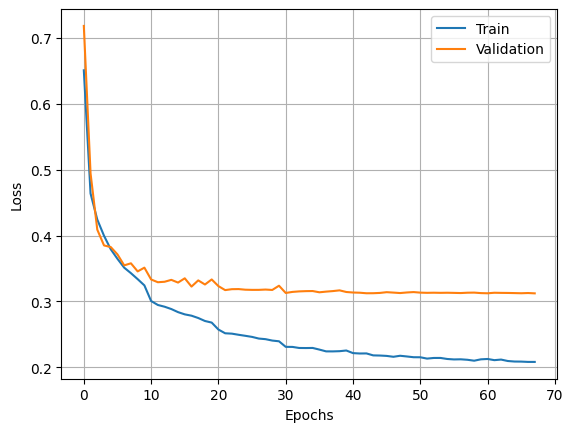

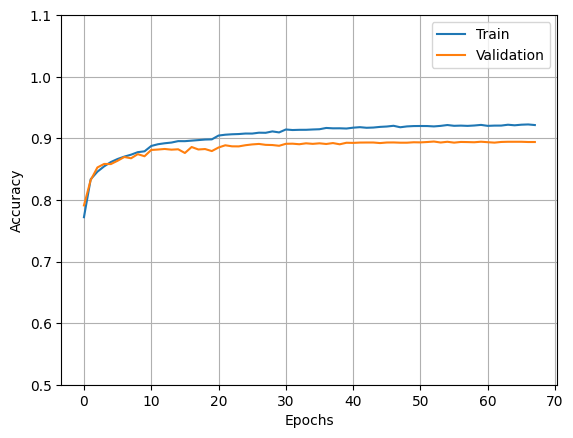

In [6]:
random_state = 42
np.random.seed(random_state)
set_random_seed(random_state)

model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=200,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=100,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=10, activation = "softmax"))

# Learning rate schedule function
def learning_rate_schedule(epoch):
  # Initial learning rate
  initial_lr = 0.2
  # Decrease factor after every n epochs
  decay_factor = 0.5
  # Decay every n epochs
  decay_step = 10

  lr = initial_lr * (decay_factor**(epoch // decay_step))
  return lr

learning_rate_scheduler_callback = LearningRateScheduler(learning_rate_schedule)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_acc', patience=15, restore_best_weights=True)

# TensorBoard callback setup
tensorboard_callback = TensorBoard(log_dir="logs/fashion_mnist", histogram_freq=1)  # Log data every epoch

model.compile(optimizer=SGD(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


model.fit(x=x_train2, y=y_train_ohe, 
          epochs=150, 
          validation_data=(x_test2, y_test_ohe), 
          batch_size=500, 
          callbacks=[learning_rate_scheduler_callback, early_stopping, tensorboard_callback])



history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

train_acc= history["acc"]
val_acc= history["val_acc"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()



In [7]:
# Evaluate model on validation set
loss, accuracy = model.evaluate(x_test2, y_test_ohe)
print('Final Validation Accuracy:', round(accuracy,4), 'and Final Validation Loss:', round(loss,4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8921 - loss: 0.3213
Final Validation Accuracy: 0.8948 and Final Validation Loss: 0.3132


In [8]:
# Check TensorBoard by typing this in terminal 

# tensorboard --logdir="C:\Users\coolc\Assignments\6 Post Modelling Activities Assignment\logs\fashion_mnist"

# Testing Model

In [9]:
preds = model.predict(x_test2)
print(preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
(10000, 10)


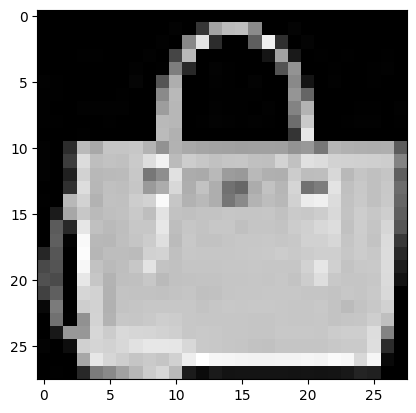

[1.2876376e-06 3.8546888e-10 9.1561168e-09 3.2034977e-10 6.7495334e-09
 1.3621814e-06 2.4042357e-08 8.1938090e-08 9.9999690e-01 3.0485762e-07]
Predicted Class Label: Bag


In [10]:
n=69
plt.imshow(x_test[n], cmap="gray")
plt.show()

print(preds[n])

preds_class_index = np.argmax(preds[n])

preds_class_label = classes[preds_class_index]
print(f"Predicted Class Label: {preds_class_label}")

In [11]:
# Saving the model
model.save('fashion_mnist_model.h5')

In [12]:
# Load the saved model
loaded_model = load_model('fashion_mnist_model.h5')

In [13]:
# Check the number of trainable parameters using model.count_params()
total_params = loaded_model.count_params()
print(f"Total number of trainable parameters: {total_params}")

# Optional: Check the model summary for additional information
loaded_model.summary()

Total number of trainable parameters: 178510


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,512 (697.32 KB)

 Trainable params: 178,310 (696.52 KB)

 Non-trainable params: 200 (800.00 B)

 Optimizer params: 2 (12.00 B)

In [14]:
load_preds = loaded_model.predict(x_test2)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


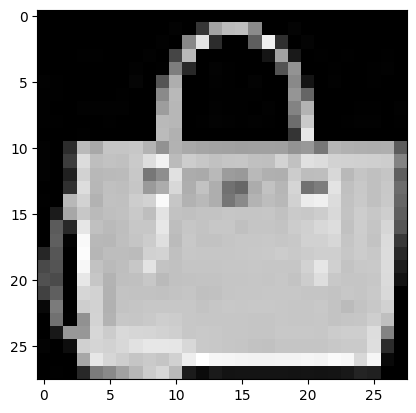

[1.2876376e-06 3.8546888e-10 9.1561168e-09 3.2034977e-10 6.7495334e-09
 1.3621814e-06 2.4042357e-08 8.1938090e-08 9.9999690e-01 3.0485762e-07]
Predicted Class Label: Bag


In [15]:
n=69
plt.imshow(x_test[n], cmap="gray")
plt.show()

print(load_preds[n])

load_preds_class_index = np.argmax(load_preds[n])

load_preds_class_label = classes[load_preds_class_index]
print(f"Predicted Class Label: {load_preds_class_label}")
